In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.set(context='notebook', style='darkgrid',palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import scipy.stats as stats
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
df1=pd.read_csv('passengers_data/T100D_SEGMENT_US_CARRIER_ONLY.csv')
df2=pd.read_csv('passengers_data/T100D_SEGMENT_US_CARRIER_ONLY2.csv')
df3=pd.read_csv('passengers_data/T100D_SEGMENT_US_CARRIER_ONLY3.csv')
df4=pd.read_csv('passengers_data/T100D_SEGMENT_US_CARRIER_ONLY4.csv')
df5=pd.read_csv('passengers_data/T100D_SEGMENT_US_CARRIER_ONLY5.csv')
df6=pd.read_csv('passengers_data/T100D_SEGMENT_US_CARRIER_ONLY6.csv')
df7=pd.read_csv('passengers_data/T100D_SEGMENT_US_CARRIER_ONLY7.csv')
df8=pd.read_csv('passengers_data/T100D_SEGMENT_US_CARRIER_ONLY8.csv')
df9=pd.read_csv('passengers_data/T100D_SEGMENT_US_CARRIER_ONLY9.csv')
df10=pd.read_csv('passengers_data/T100D_SEGMENT_US_CARRIER_ONLY10.csv')

In [9]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])

In [10]:
df.shape

(3620968, 46)

In [11]:
df.shape

(3620968, 46)

In [12]:
df.drop('Unnamed: 45', axis=1, inplace= True)

In [13]:
df.describe()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP
count,3620968.000,3620968.000,3620968.000,3620968.000,3620968.000,3620968.000,3620968.000,3620968.000,3620968.000,3620968.000,...,3620968.000,3620968.000,3620968.000,3620968.000,3620968.000,3620968.000,3620968.000,3620968.000,3620968.000,3620968.000
mean,23.833,24.806,738521.505,2425.052,1959.020,61020.848,2843.641,655.535,2955.946,2414.965,...,32021.749,24.113,44.848,5.260,574.511,1.211,2014.621,2.516,6.559,1.876
std,41.979,39.864,1390640.256,4882.867,4049.662,376426.009,23526.255,599.277,5225.715,4441.148,...,1487.618,17.922,30.190,1.731,180.048,0.535,2.880,1.114,3.446,1.165
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,30003.000,1.000,1.000,0.000,10.000,1.000,2010.000,1.000,1.000,1.000
25%,0.000,1.000,32200.000,45.000,8.000,0.000,0.000,201.000,142.000,115.000,...,30783.000,6.000,22.000,6.000,612.000,1.000,2012.000,2.000,4.000,1.000
50%,5.000,9.000,176479.000,343.000,237.000,0.000,0.000,501.000,816.000,645.000,...,31650.000,22.000,41.000,6.000,629.000,1.000,2015.000,3.000,7.000,2.000
75%,31.000,31.000,919540.000,2950.000,2294.000,1804.000,0.000,931.000,3851.000,3021.000,...,33192.000,39.000,74.000,6.000,675.000,1.000,2017.000,4.000,10.000,2.000
max,2361.000,1330.000,36450000.000,110336.000,95777.000,23905955.000,8163150.000,8253.000,895725.000,180007.000,...,36843.000,78.000,93.000,8.000,889.000,4.000,2019.000,4.000,12.000,17.000


In [14]:
df.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG', 'YEAR', 'QUARTER',
       'MONTH', 'DISTANCE_GROUP', 'CLASS'],
      dtype='object')

## Exploratory Data Analysis

In [15]:
df.AIRCRAFT_TYPE.value_counts().head()
#614: Boeing 737-800
#612: Boeing 737-700/700LR/Max 7
#694: Airbus Industrie A320-100/200
#629: Canadair RJ-200ER /RJ-440
#416: Cessna 208 Caravan

614    260361
694    222488
629    218649
612    212370
416    187638
Name: AIRCRAFT_TYPE, dtype: int64

In [16]:
df.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG', 'YEAR', 'QUARTER',
       'MONTH', 'DISTANCE_GROUP', 'CLASS'],
      dtype='object')

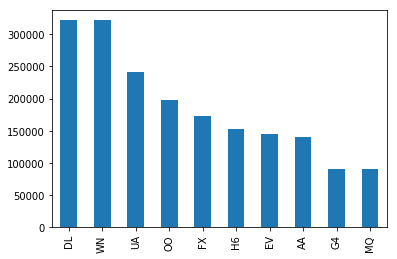

In [17]:
#Top 10 Carrier in general
df['UNIQUE_CARRIER'].value_counts().head(10).plot(kind='bar')

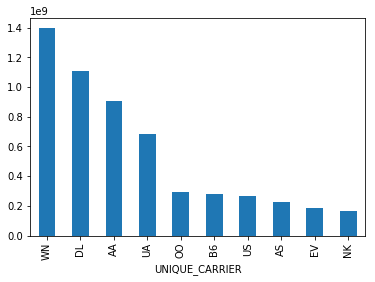

In [18]:
#Top 10 Carrier that has the most passengers
df.groupby(['UNIQUE_CARRIER']).sum()['PASSENGERS'].sort_values(ascending=False).head(10).plot(kind='bar')

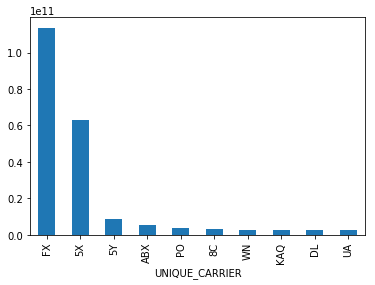

In [19]:
#Top 10 Carrier that has the most freight
df.groupby(['UNIQUE_CARRIER']).sum()['FREIGHT'].sort_values(ascending=False).head(10).plot(kind='bar')

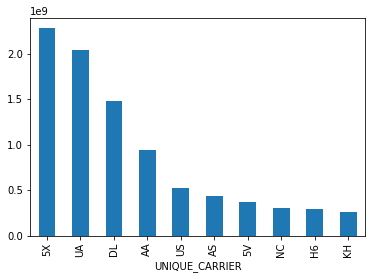

In [20]:
#Top 10 Carrier that has the most freight
df.groupby(['UNIQUE_CARRIER']).sum()['MAIL'].sort_values(ascending=False).head(10).plot(kind='bar')

In [21]:
#TOP 10 airlines that have most flights
top_10_airline=df['UNIQUE_CARRIER'].value_counts().head(10).index.tolist()

In [22]:
top_airline_df=df[df['UNIQUE_CARRIER'].isin((top_10_airline))]

In [23]:
top_airline_df.groupby(['UNIQUE_CARRIER','YEAR']).sum().head()

DEPARTURES_SCHEDULED  DEPARTURES_PERFORMED  \
UNIQUE_CARRIER YEAR                                               
AA             2010            543162.000            534179.000   
               2011            540542.000            527116.000   
               2012            527461.000            517971.000   
               2013            540068.000            530412.000   
               2014            540051.000            531688.000   

                            PAYLOAD        SEATS   PASSENGERS       FREIGHT  \
UNIQUE_CARRIER YEAR                                                           
AA             2010 22443355110.000 82012305.000 66542740.000 237078586.000   
               2011 21962258359.000 81222329.000 66080892.000 203631291.000   
               2012 21657625600.000 79858885.000 65694310.000 225434682.000   
               2013 22031434915.000 79268935.000 65547434.000 232549983.000   
               2014 21860476385.000 79557472.000 66744657.000 185993942.000   

                            MAIL     DISTANCE  RAMP_TO_RAMP     AIR_TIME  ...  \
UNIQUE_CARRIER YEAR                                                       ...   
AA             2010 61342651.000 10104939.000  88567868.000 75951169.000  ...   
               2011 38955914.000  9624496.000  86877107.000 74700082.000  ...   
               2012 12680956.000  9164800.000  85499404.000 73188182.000  ...   
               2013 14784440.000  9262178.000  87849294.000 75163393.000  ...   
               2014 16913094.000  9306344.000  89711362.000 76319164.000  ...   

                     DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID  \
UNIQUE_CARRIER YEAR                                             
AA             2010          11574808786            285746072   
               2011          11129898354            275599945   
               2012          10586074308            262521725   
               2013          10888157069            270365192   
               2014          11193832941            278676021   

                     DEST_STATE_FIPS  DEST_WAC  AIRCRAFT_GROUP  AIRCRAFT_TYPE  \
UNIQUE_CARRIER YEAR                                                             
AA             2010           257541    496599           54066        5708157   
               2011           250429    474271           52164        5495641   
               2012           239502    462408           49734        5234148   
               2013           252409    481057           51240        5390832   
               2014           259719    500222           52872        5593057   

                     AIRCRAFT_CONFIG  QUARTER  MONTH  DISTANCE_GROUP  
UNIQUE_CARRIER YEAR                                                   
AA             2010             9011    22134  57577           25075  
               2011             8694    21520  55827           24023  
               2012             8289    20593  53507           22874  
               2013             8540    21491  56003           23152  
               2014             8812    22047  57333           23398  

[5 rows x 29 columns]

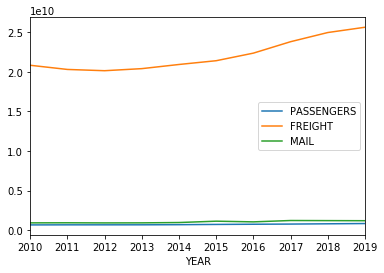

In [24]:
df.groupby('YEAR').sum()[['PASSENGERS','FREIGHT','MAIL']].plot()

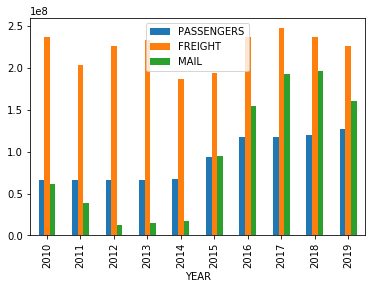

In [25]:
df[df['UNIQUE_CARRIER']=='AA'].groupby('YEAR').sum()[['PASSENGERS','FREIGHT','MAIL']].plot(kind='bar')

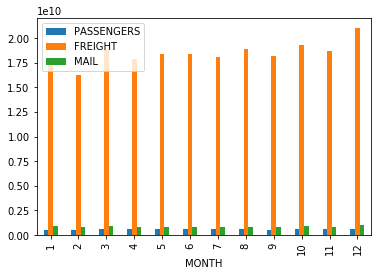

In [26]:
df.groupby('MONTH').sum()[['PASSENGERS','FREIGHT','MAIL']].plot(kind='bar')

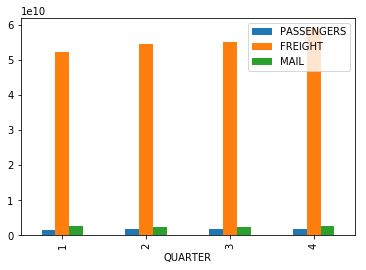

In [27]:
df.groupby('QUARTER').sum()[['PASSENGERS','FREIGHT','MAIL']].plot(kind='bar')

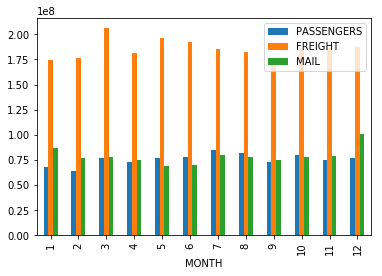

In [28]:
df[df['UNIQUE_CARRIER']=='AA'].groupby('MONTH').sum()[
    ['PASSENGERS','FREIGHT','MAIL']].plot(kind='bar') 

In [29]:
#Let's find the most popular destination airport 

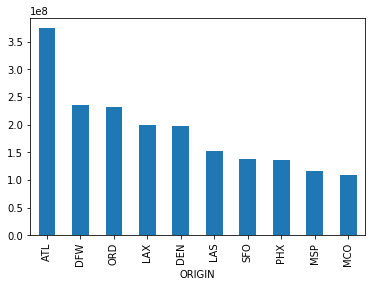

In [30]:
(top_airline_df.groupby('ORIGIN').sum()['PASSENGERS']
                                         .sort_values(ascending=False)).head(10).plot(kind='bar')

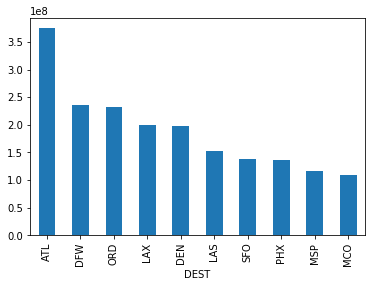

In [31]:
(top_airline_df.groupby('DEST').sum()['PASSENGERS']
                                         .sort_values(ascending=False)).head(10).plot(kind='bar')

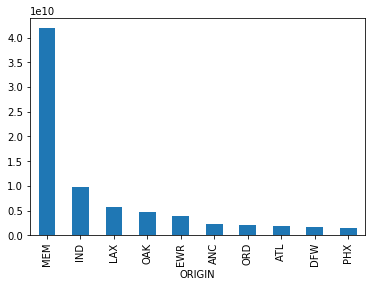

In [32]:
(top_airline_df.groupby('ORIGIN').sum()['FREIGHT']
                                         .sort_values(ascending=False)).head(10).plot(kind='bar')

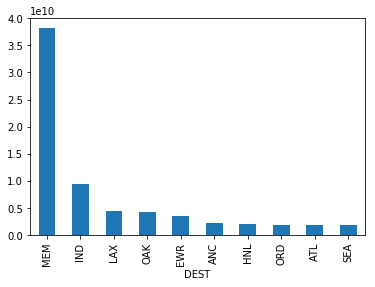

In [33]:
(top_airline_df.groupby('DEST').sum()['FREIGHT']
                                         .sort_values(ascending=False)).head(10).plot(kind='bar')

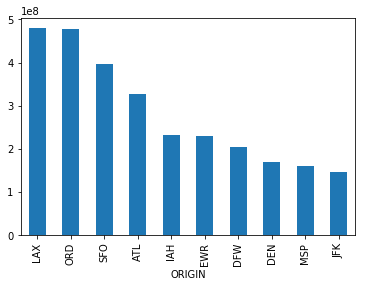

In [34]:
(top_airline_df.groupby('ORIGIN').sum()['MAIL']
                                         .sort_values(ascending=False)).head(10).plot(kind='bar')

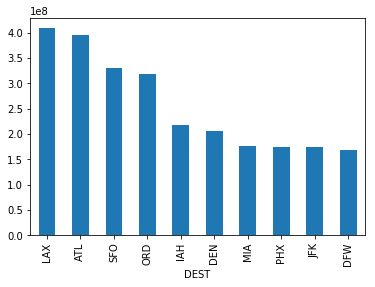

In [35]:
(top_airline_df.groupby('DEST').sum()['MAIL']
                                         .sort_values(ascending=False)).head(10).plot(kind='bar')

In [36]:
df.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG', 'YEAR', 'QUARTER',
       'MONTH', 'DISTANCE_GROUP', 'CLASS'],
      dtype='object')

In [37]:
data = df[['PAYLOAD','PASSENGERS','SEATS','FREIGHT','MAIL','YEAR','QUARTER','MONTH']]

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3620968 entries, 0 to 345003
Data columns (total 8 columns):
PAYLOAD       float64
PASSENGERS    float64
SEATS         float64
FREIGHT       float64
MAIL          float64
YEAR          int64
QUARTER       int64
MONTH         int64
dtypes: float64(5), int64(3)
memory usage: 248.6 MB


In [39]:
data['EMPTY_SEATS']=data['SEATS']-data['PASSENGERS']

/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
import datetime
from datetime import date

In [41]:
data['DAY_PROXY'] = 1

data.YEAR = data.YEAR.apply(str)
data.MONTH = data.MONTH.apply(str)
data.DAY_PROXY = data.DAY_PROXY.apply(str)

/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3620968 entries, 0 to 345003
Data columns (total 10 columns):
PAYLOAD        float64
PASSENGERS     float64
SEATS          float64
FREIGHT        float64
MAIL           float64
YEAR           object
QUARTER        int64
MONTH          object
EMPTY_SEATS    float64
DAY_PROXY      object
dtypes: float64(6), int64(1), object(3)
memory usage: 303.9+ MB


In [43]:
data['DATE'] = data.MONTH + '/' + data.DAY_PROXY + '/' + data.YEAR

/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
data.head()

,PAYLOAD,PASSENGERS,SEATS,FREIGHT,MAIL,YEAR,QUARTER,MONTH,EMPTY_SEATS,DAY_PROXY,DATE
0,38068.000,146.000,166.000,0.000,0.000,2019,3,8,20.000,1,8/1/2019
1,42071.000,150.000,166.000,0.000,0.000,2019,3,8,16.000,1,8/1/2019
2,43395.000,130.000,142.000,17.000,0.000,2019,3,8,12.000,1,8/1/2019
3,32849.000,147.000,150.000,0.000,0.000,2019,3,8,3.000,1,8/1/2019
4,48682.000,160.000,169.000,63.000,0.000,2019,3,8,9.000,1,8/1/2019


In [45]:
data['DATE'] = pd.to_datetime(data.DATE)

/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3620968 entries, 0 to 345003
Data columns (total 11 columns):
PAYLOAD        float64
PASSENGERS     float64
SEATS          float64
FREIGHT        float64
MAIL           float64
YEAR           object
QUARTER        int64
MONTH          object
EMPTY_SEATS    float64
DAY_PROXY      object
DATE           datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 331.5+ MB


In [47]:
tsdf = data.groupby('DATE').sum()
tsdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2010-01-01 to 2019-12-01
Data columns (total 7 columns):
PAYLOAD        120 non-null float64
PASSENGERS     120 non-null float64
SEATS          120 non-null float64
FREIGHT        120 non-null float64
MAIL           120 non-null float64
QUARTER        120 non-null int64
EMPTY_SEATS    120 non-null float64
dtypes: float64(6), int64(1)
memory usage: 7.5 KB


In [48]:
tsdf.drop('QUARTER',axis=1,inplace=True)

In [49]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(tsdf)

                   PAYLOAD   PASSENGERS        SEATS        FREIGHT  \
DATE                                                                  
2010-01-01 20221230202.000 46717947.000 66617337.000 1582087091.000   
2010-02-01 18231528323.000 43498396.000 59442504.000 1529047157.000   
2010-03-01 21467739489.000 55804909.000 70673162.000 1764835211.000   
2010-04-01 21025378093.000 53768509.000 68726880.000 1746444288.000   
2010-05-01 21345539285.000 55184999.000 70321656.000 1714054671.000   
2010-06-01 21594530054.000 58224298.000 71068668.000 1763624364.000   
2010-07-01 22263158310.000 60780260.000 73719985.000 1758527183.000   
2010-08-01 22199949061.000 58940421.000 73555947.000 1735955564.000   
2010-09-01 20773704491.000 51621759.000 68116903.000 1766659172.000   
2010-10-01 21553741439.000 56205888.000 70617110.000 1810424478.000   
2010-11-01 20770366392.000 52712642.000 68019087.000 1693043200.000   
2010-12-01 21643663670.000 52486676.000 68289115.000 1980105814.000   
2011-0

In [52]:
tsdf.to_pickle("./tsdata.pkl")

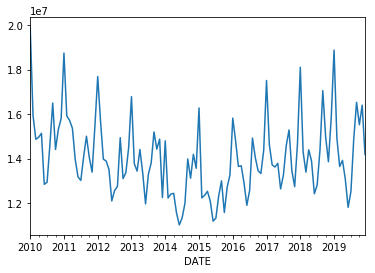

In [51]:
tsdf.groupby('DATE').sum()['EMPTY_SEATS'].plot();